<a href="https://colab.research.google.com/github/Vaishali0418/Machine_Learning/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaishalirathore24","key":"47444d9d4c32fc37177eec0f64f62529"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 95.2MB/s]


In [ ]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [9]:
df = pd.read_csv('/content/test.csv')

In [10]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Exploratory Data Analysis (EDA):

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Data Preprocessing and Wrangling:

In [14]:
dict(df.isnull().sum())

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 4,
 'LotFrontage': 227,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1352,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 2,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'MasVnrArea': 15,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 44,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinType1': 42,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 42,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 0,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 1,
 'TotRmsAbvGrd': 0,
 'Functional': 2,
 'F

In [15]:
# For numerical columns, fill missing values with the mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

<Axes: >

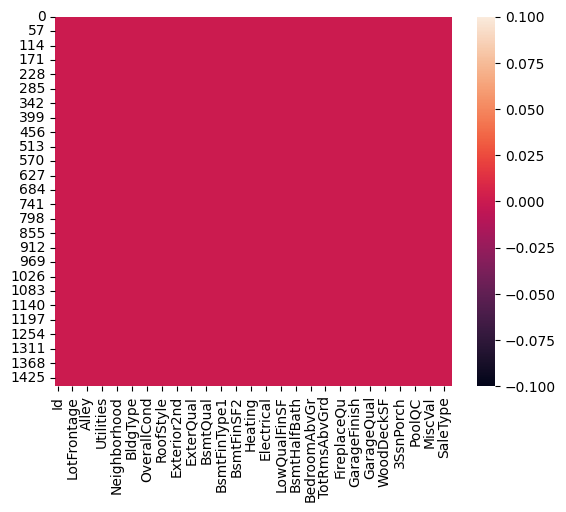

In [16]:
sns.heatmap(df.isnull())

## Data Visualization:

Histogram of SalePrice: Visualize the distribution of the target variable SalePrice using a histogram.

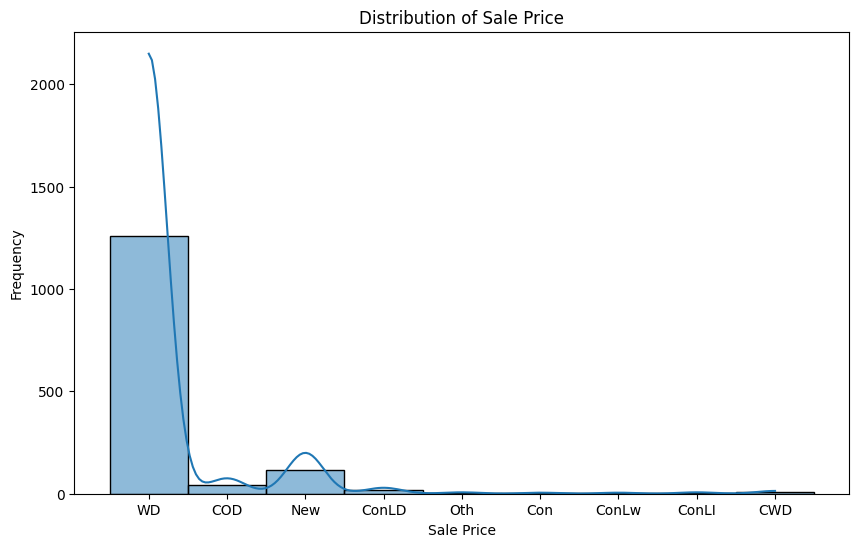

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SaleType'], kde=True, bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

**Box Plot of OverallQual vs. SalePrice: Show how OverallQual relates to SalePrice**

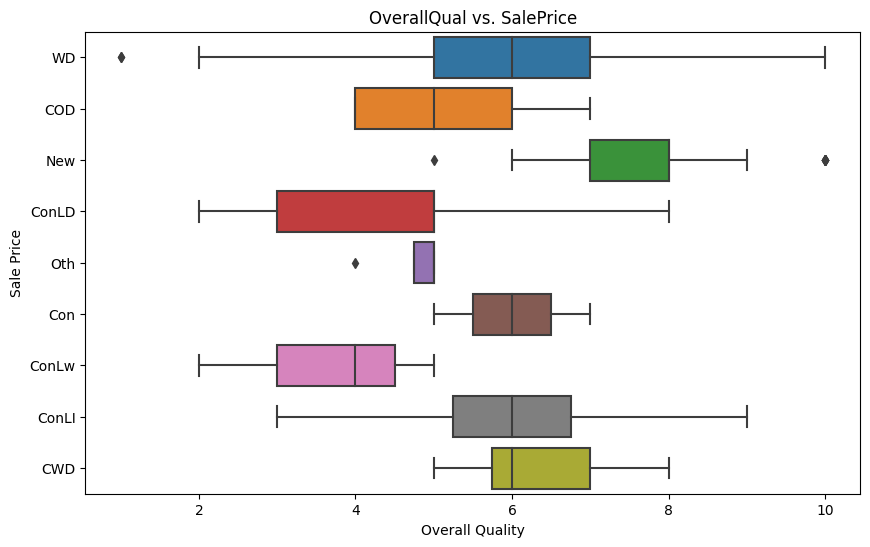

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['OverallQual'], y=df['SaleType'])
plt.title('OverallQual vs. SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

## Scatter Plot of GrLivArea vs. SalePrice: Visualize the relationship between the living area (GrLivArea) and SalePrice.

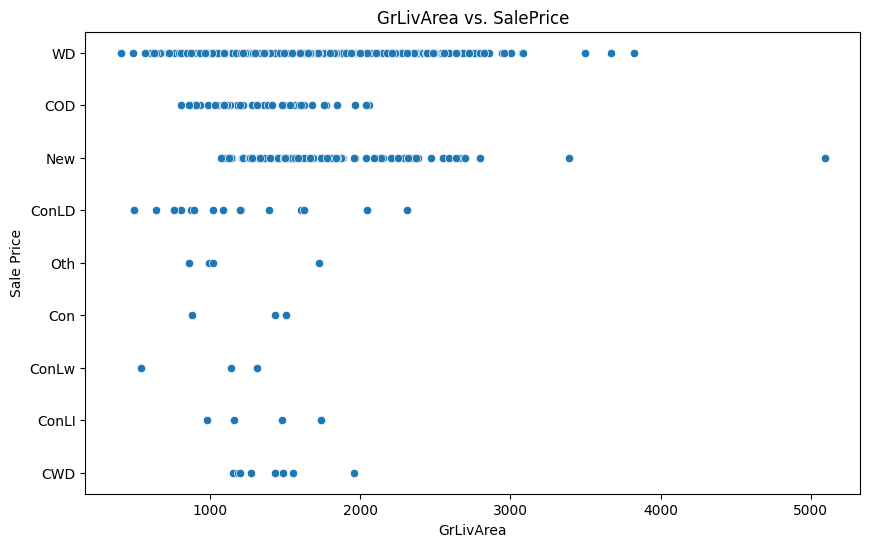

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SaleType'])
plt.title('GrLivArea vs. SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.show()

## Data Splitting:

In [25]:
from sklearn.model_selection import train_test_split
x = df.drop(['SaleType'], axis=1)
y = df['SaleType']

In [27]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,120,0,Ex,MnPrv,Shed,0,6,2010,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,0,Ex,MnPrv,Gar2,12500,6,2010,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,0,Ex,MnPrv,Shed,0,3,2010,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,0,Ex,MnPrv,Shed,0,6,2010,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,144,0,Ex,MnPrv,Shed,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,Ex,MnPrv,Shed,0,6,2006,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,Ex,MnPrv,Shed,0,4,2006,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,Ex,MnPrv,Shed,0,9,2006,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,Ex,MnPrv,Shed,700,7,2006,Normal


In [28]:
y

0       WD
1       WD
2       WD
3       WD
4       WD
        ..
1454    WD
1455    WD
1456    WD
1457    WD
1458    WD
Name: SaleType, Length: 1459, dtype: object

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
train_df = x_train.join(y_train)

In [31]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SaleType
254,1715,60,FV,65.000000,8127,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2009,Normal,WD
1065,2526,20,RL,45.000000,8982,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,1,2007,Normal,WD
864,2325,20,RL,59.000000,10936,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2007,Partial,New
798,2259,60,RL,68.580357,7655,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,7,2007,Normal,WD
380,1841,90,RL,68.580357,10547,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,7,2009,Normal,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2556,20,RL,60.000000,8172,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,7,2007,Normal,WD
1130,2591,20,RL,149.000000,19958,Pave,Grvl,Reg,Lvl,AllPub,...,138,0,Ex,GdPrv,Shed,0,7,2007,Normal,WD
1294,2755,50,RL,50.000000,7500,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,10,2006,Normal,WD
860,2321,120,RL,68.580357,3621,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,11,2007,Normal,WD


In [32]:
# train_df.hist(figsize= (16, 8))

In [33]:
train_df['SaleType'].value_counts()

WD       1001
New       100
COD        34
ConLD      14
CWD         6
ConLI       4
Oth         3
Con         3
ConLw       2
Name: SaleType, dtype: int64